# Standard Pattern Analysis
------------------------------------------------------------
In this notebook we show the $\zeta$-space of the standard time-series patterns. Details of the models are presented in the following links:

- [Colored Noise](https://github.com/rsautter/Zeta-Space/blob/main/examples/ColoredNoiseExample.ipynb)
- [Lorenz Synchronization](https://github.com/rsautter/Zeta-Space/blob/main/examples/LorenzSynchronizationExample.ipynb)
- [P-Model](https://github.com/rsautter/Zeta-Space/blob/main/examples/ExtremeZetaExample.ipynb)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zLorenz.csv
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zEndo.csv
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zExo.csv
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zWhite.csv
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zPink.csv
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zRed.csv

--2022-08-21 18:03:31--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zLorenz.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188 [text/plain]
Saving to: ‘zLorenz.csv’

zLorenz.csv         100%[===================>]     188  --.-KB/s    in 0s      

2022-08-21 18:03:31 (13.7 MB/s) - ‘zLorenz.csv’ saved [188/188]

--2022-08-21 18:03:31--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zEndo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8339 (8.1K) [text/plain]
Saving to: ‘zEndo.cs

In [5]:
endo,exo = pd.read_csv("zEndo.csv"),pd.read_csv("zExo.csv")
white,pink,red = pd.read_csv("zWhite.csv"),pd.read_csv("zPink.csv"),pd.read_csv("zRed.csv")
lorenz = pd.read_csv("zLorenz.csv")

In [7]:
lorenz['dspec'],lorenz['ddelta'] = 0.80*(lorenz.shift(periods=-1)-lorenz)['ISE'],0.80*(lorenz.shift(periods=-1)-lorenz)['LDA']

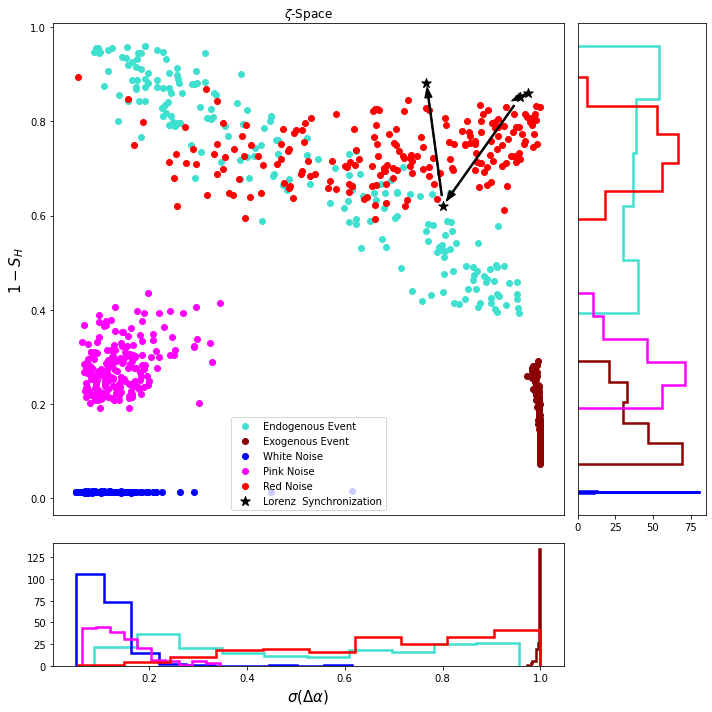

In [8]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(10,10))

gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1])

plt.subplot(gs[0,0])
plt.title(r"$\zeta$-Space")
plt.scatter(endo['LDA'], endo['ISE'],color='turquoise',label="Endogenous Event")
plt.scatter(exo['LDA'], exo['ISE'],color='darkred',label="Exogenous Event")
plt.scatter(white['LDA'], white['ISE'],color='blue',label="White Noise")
plt.scatter(pink['LDA'], pink['ISE'],color='magenta',label="Pink Noise")
plt.scatter(red['LDA'], red['ISE'],color='red',label="Red Noise")

for index,l in lorenz.dropna().iterrows():
  par = 0.1
  plt.arrow(l['LDA']+par*l['ddelta'], l['ISE']+par*l['dspec'],l['ddelta'],l['dspec'],color='k', head_width=0.015,width=0.003)

for index,l in lorenz.iterrows():
  if (index==0):
    plt.scatter(l['LDA'], l['ISE'],marker = '*',color='k',s=100,label='Lorenz  Synchronization')
  else:
    plt.scatter(l['LDA'], l['ISE'],marker = '*',color='k',s=100)

plt.ylabel("$1-S_H$",fontsize=15)

plt.xticks([])
plt.legend()

plt.subplot(gs[0,1])
plt.hist(endo['ISE'],color='turquoise',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(exo['ISE'],color='darkred',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(white['ISE'],color='blue',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(pink['ISE'],color='magenta',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(red['ISE'],color='red',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.yticks([])

plt.subplot(gs[1,0])
plt.hist(endo['LDA'],color='turquoise',histtype='step',lw=2.5)
plt.hist(exo['LDA'],color='darkred',histtype='step',lw=2.5)
plt.hist(white['LDA'],color='blue',histtype='step',lw=2.5)
plt.hist(pink['LDA'],color='magenta',histtype='step',lw=2.5)
plt.hist(red['LDA'],color='red',histtype='step',lw=2.5)
plt.xlabel(r"$\sigma (\Delta\alpha)$",fontsize=15)

plt.tight_layout()
plt.show()